## Minimal Example on text2img with text LoRA + unet LoRA + textual inversion



Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

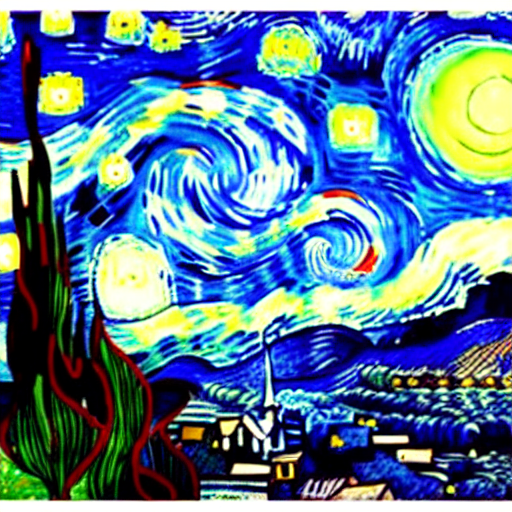

In [96]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "<krk>, starry night"
torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image  # nice, but that's the base model.

  0%|          | 0/50 [00:00<?, ?it/s]

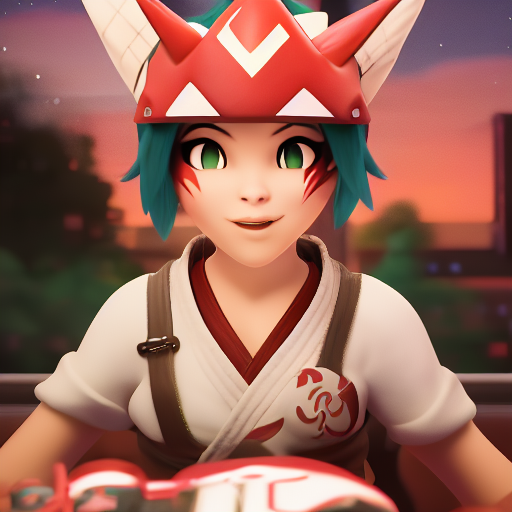

In [97]:
from lora_diffusion import patch_pipe, tune_lora_scale


patch_pipe(pipe, "../output_example_text_ti_1e-4_after1500/lora_weight_e84_s2550.pt","<krk>", patch_text=True, patch_ti=True)
tune_lora_scale(pipe.unet, 1.00)

torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]

image  # Wow ok, now I might have to deal with a lawsuite for this.


So we see that the model is overfitting. Let's tune $\alpha$ to see if we can get better results.
Let's tune it for both unet and text encoder.


  0%|          | 0/50 [00:00<?, ?it/s]

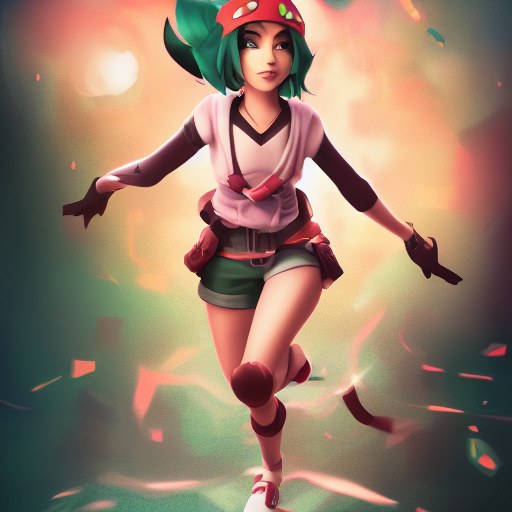

In [121]:
tune_lora_scale(pipe.unet, 0.9)
tune_lora_scale(pipe.text_encoder,0.9)
torch.manual_seed(0)
prompt = "female 3d game character <krk>, Skill magic geek inside matrix deepdream radiating a glowing aura stuff loot legends stylized digital illustration video game icon artstation lois van baarle, ilya kuvshinov, rossdraws"

pipe.safety_checker = None
image = pipe(prompt, num_inference_steps=50, guidance_scale=4.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

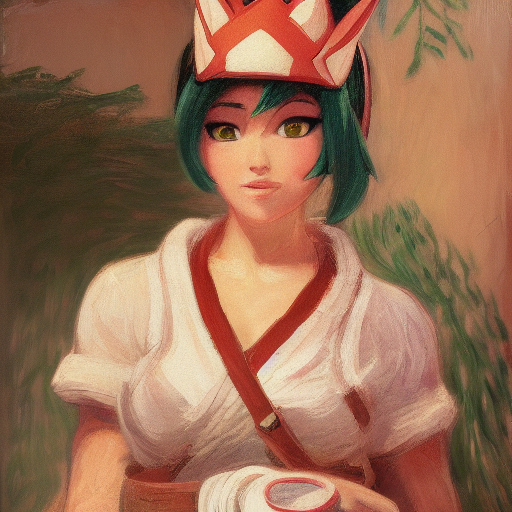

In [122]:
tune_lora_scale(pipe.unet, 0.9)
tune_lora_scale(pipe.text_encoder,0.9)
torch.manual_seed(0)
prompt = "portrait of female 3d game character <krk>, impressionist style from the 19th century, claude monet, oil painting"
pipe.safety_checker = None
image = pipe(prompt, num_inference_steps=50, guidance_scale=4.5).images[0]
image